In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import smogn
import seaborn as sns

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
hospital = pd.read_csv("../Generating Data/new.csv")

In [110]:
hospital = hospital.drop(["Unnamed: 0","id"],axis=1)
hospital

,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,21,74,1,166.911029,80.265922,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,61,0,154.900000,73.600000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,58,0,166.911029,80.265922,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,94,1,182.800000,66.200000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,91,1,166.911029,80.265922,1.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2,56,0,165.000000,72.600000,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
502,13,74,0,166.911029,55.000000,0.0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
503,19,81,1,158.000000,65.000000,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,9,74,1,166.911029,81.700000,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [111]:
hospital['long_term'] = hospital['hospital_length_of_stay'].apply(lambda x: 0 if x > 29 else 1)

In [112]:
hospital

,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,long_term
0,21,74,1,166.911029,80.265922,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,61,0,154.900000,73.600000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,7,58,0,166.911029,80.265922,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,9,94,1,182.800000,66.200000,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,9,91,1,166.911029,80.265922,1.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2,56,0,165.000000,72.600000,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
502,13,74,0,166.911029,55.000000,0.0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
503,19,81,1,158.000000,65.000000,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
504,9,74,1,166.911029,81.700000,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [113]:
hospital_smogn = smogn.smoter(data = hospital, y = 'long_term', k = 22,)

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/smogn/phi.py:81: RuntimeWarning: divide by zero encountered in scalar divide
  delta.append((y_rel[i + 1] - y_rel[i]) / h[i])
r_index: 100%|###################################| 2/2 [00:00<00:00, 108.94it/s]
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/smogn/over_sampling.py:446: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_new.insert(
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/smogn/over_sampling.py:446: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [114]:
print(hospital.shape)
hospital_smogn.shape

(506, 747)


(455, 747)

In [115]:
hospital_merge = hospital_smogn.merge(hospital, how='left', indicator = True)

hospital_merge = hospital_merge[hospital_merge['_merge'] == 'left_only'].drop(columns=['_merge'])

hospital_merge

,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,long_term
253,33.0,59.0,0.0,160.913257,101.086469,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
254,34.0,59.0,0.0,161.241558,101.861234,0.001998,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
255,34.0,59.0,0.0,160.876849,100.510357,0.000000,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
256,34.0,60.0,0.0,160.662968,100.985175,0.002359,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
257,34.0,73.0,0.0,170.065458,76.991882,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,52.0,89.0,0.0,179.307587,84.185935,0.009876,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
451,51.0,90.0,1.0,178.989249,83.197089,0.009904,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
452,52.0,90.0,1.0,179.264755,84.119058,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
453,31.0,43.0,0.0,177.176532,112.519673,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [116]:
hospital_merge = pd.concat([hospital, hospital_merge], axis=0)

hospital_merge

,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil,long_term
0,21.0,74.0,1.0,166.911029,80.265922,0.000000,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5.0,61.0,0.0,154.900000,73.600000,0.000000,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,7.0,58.0,0.0,166.911029,80.265922,0.000000,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,9.0,94.0,1.0,182.800000,66.200000,0.000000,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,9.0,91.0,1.0,166.911029,80.265922,1.000000,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,52.0,89.0,0.0,179.307587,84.185935,0.009876,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
451,51.0,90.0,1.0,178.989249,83.197089,0.009904,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
452,52.0,90.0,1.0,179.264755,84.119058,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
453,31.0,43.0,0.0,177.176532,112.519673,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### We will continue the data analysis on the hospital length of stay column for original dataset

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_15561/3536012431.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=hospital['hospital_length_of_stay'], inner="quartile", palette="pastel", ax=axes[2])


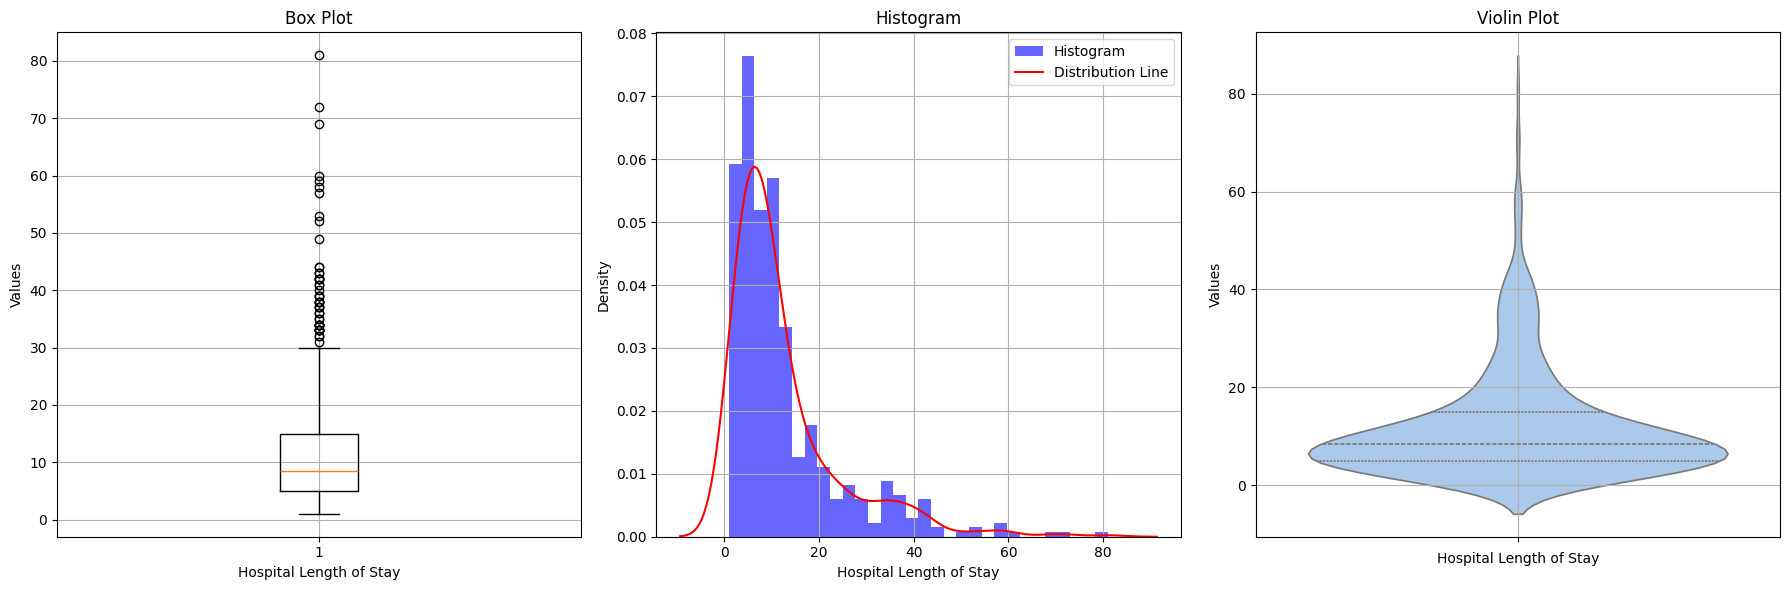

In [117]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot
axes[0].boxplot(hospital['hospital_length_of_stay'])
axes[0].set_title('Box Plot')
axes[0].set_xlabel('Hospital Length of Stay')
axes[0].set_ylabel('Values')
axes[0].grid(True)

# Histogram with KDE plot
axes[1].hist(hospital['hospital_length_of_stay'], bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
sns.kdeplot(hospital['hospital_length_of_stay'], color='red', label='Distribution Line', ax=axes[1])
axes[1].set_title('Histogram')
axes[1].set_xlabel('Hospital Length of Stay')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True)

# Violin plot
sns.violinplot(data=hospital['hospital_length_of_stay'], inner="quartile", palette="pastel", ax=axes[2])
axes[2].set_title('Violin Plot')
axes[2].set_xlabel('Hospital Length of Stay')
axes[2].set_ylabel('Values')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [118]:
hospital.hospital_length_of_stay.value_counts()

hospital_length_of_stay
3     43
8     37
5     35
4     34
10    34
6     34
7     33
9     29
2     28
12    20
13    17
11    14
17    10
16     9
1      9
19     8
15     8
14     8
22     6
25     6
18     6
21     6
24     5
34     5
33     5
42     4
38     4
28     3
39     3
29     3
23     3
37     3
20     3
26     3
41     2
27     2
43     2
35     2
44     2
36     2
30     2
32     2
69     1
49     1
52     1
72     1
60     1
81     1
53     1
40     1
59     1
57     1
58     1
31     1
Name: count, dtype: int64

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_15561/1984900017.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=hospital_smogn['hospital_length_of_stay'], inner="quartile", palette="pastel", ax=axes[2])


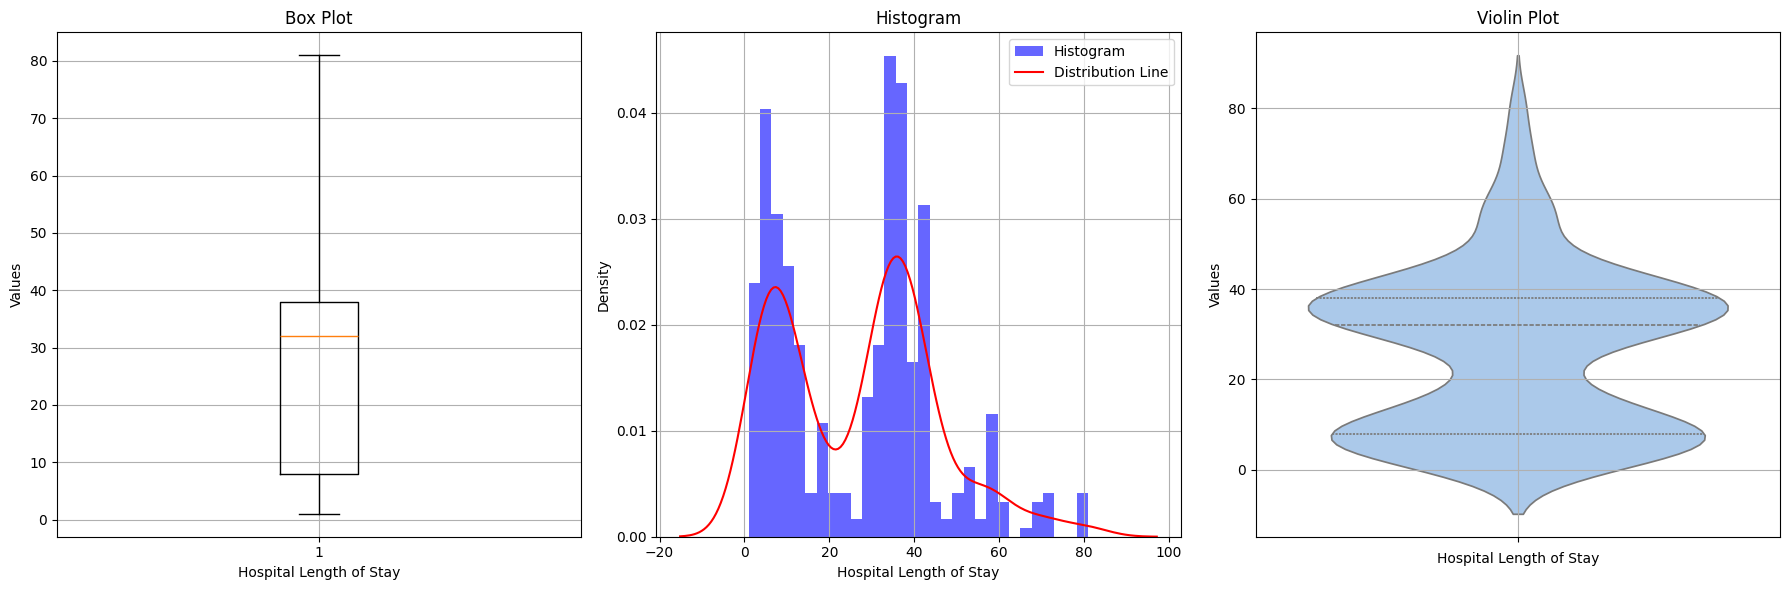

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot
axes[0].boxplot(hospital_smogn['hospital_length_of_stay'])
axes[0].set_title('Box Plot')
axes[0].set_xlabel('Hospital Length of Stay')
axes[0].set_ylabel('Values')
axes[0].grid(True)

# Histogram with KDE plot
axes[1].hist(hospital_smogn['hospital_length_of_stay'], bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
sns.kdeplot(hospital_smogn['hospital_length_of_stay'], color='red', label='Distribution Line', ax=axes[1])
axes[1].set_title('Histogram')
axes[1].set_xlabel('Hospital Length of Stay')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True)

# Violin plot
sns.violinplot(data=hospital_smogn['hospital_length_of_stay'], inner="quartile", palette="pastel", ax=axes[2])
axes[2].set_title('Violin Plot')
axes[2].set_xlabel('Hospital Length of Stay')
axes[2].set_ylabel('Values')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [120]:
hospital_merge.hospital_length_of_stay.value_counts()

hospital_length_of_stay
3.0     43
8.0     37
5.0     35
6.0     34
4.0     34
        ..
80.0     2
51.0     2
72.0     1
68.0     1
65.0     1
Name: count, Length: 61, dtype: int64